Esta notebook contiene bloques de código útiles para realizar Q-learning en el entorno "Pendulum"

In [57]:
import numpy as np
from tqdm import tqdm
from pendulum_env_extended import PendulumEnvExtended
import random 
import matplotlib.pyplot as plt

In [58]:
env = PendulumEnvExtended(render_mode="rgb_array")

In [59]:
max_steps= env.max_steps
max_steps

700

Discretización de los estados

In [60]:
x_space_partitions = 21
y_space_partitions = 21
vel_space_partitions = 65

In [61]:
x_space = np.linspace(-1, 1, x_space_partitions)
x_space

array([-1. , -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ,
        0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ])

In [62]:
y_space = np.linspace(-1, 1, x_space_partitions)
y_space

array([-1. , -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ,
        0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ])

In [63]:

vel_space = np.linspace(-8, 8, vel_space_partitions)
vel_space

array([-8.  , -7.75, -7.5 , -7.25, -7.  , -6.75, -6.5 , -6.25, -6.  ,
       -5.75, -5.5 , -5.25, -5.  , -4.75, -4.5 , -4.25, -4.  , -3.75,
       -3.5 , -3.25, -3.  , -2.75, -2.5 , -2.25, -2.  , -1.75, -1.5 ,
       -1.25, -1.  , -0.75, -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,
        1.  ,  1.25,  1.5 ,  1.75,  2.  ,  2.25,  2.5 ,  2.75,  3.  ,
        3.25,  3.5 ,  3.75,  4.  ,  4.25,  4.5 ,  4.75,  5.  ,  5.25,
        5.5 ,  5.75,  6.  ,  6.25,  6.5 ,  6.75,  7.  ,  7.25,  7.5 ,
        7.75,  8.  ])

Obtener el estado a partir de la observación

In [64]:
def get_state(obs):
    x, y, vel = obs
    x_bin = np.digitize(x, x_space)
    y_bin = np.digitize(y, y_space)
    vel_bin = np.digitize(vel, vel_space)
    return x_bin, y_bin, vel_bin

In [65]:
state = get_state(np.array([-0.4, 0.2, 0.3]))
state

(6, 12, 34)

Discretización de las acciones

In [66]:
actions_partitions = 21

In [67]:
actions = list(np.linspace(-2, 2, actions_partitions))

In [68]:
def get_sample_action():
    return random.choice(actions)

Inicilización de la tabla Q

In [69]:
Q = np.zeros((len(x_space) + 1, len(y_space) + 1, len(vel_space) + 1, len(actions)))
Q

array([[[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        ...,

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
    

Obtención de la acción a partir de la tabla Q

In [70]:
def optimal_policy(state, Q):
    action = actions[np.argmax(Q[state])]
    return action

Epsilon-Greedy Policy

In [71]:
def epsilon_greedy_policy(state, Q, epsilon=0.1):
    explore = np.random.binomial(1, epsilon)
    if explore:
        action = get_sample_action()
    # exploit
    else:
        action = optimal_policy(state, Q)
        
    return action

Ejemplo de episodio 

In [72]:
obs,_ = env.reset()
done = False
total_reward = 0
state = get_state(obs)
while not done:
    # Acción del modelo
    action = epsilon_greedy_policy(state, Q, 0.5)
    
    # Indice de la accion en Q
    action_idx = actions.index(action)
    
    # Acción del ambiente
    real_action = np.array([action_idx])
     
    obs, reward, done, _, _ = env.step(real_action)
    next_state = get_state(obs)
    
   # Usar action_idx para actualizar Q
   
    total_reward += reward
    print('->', state, action, reward, obs, done)
print('total_reward', total_reward)

-> (7, 20, 31) -2.0 -3.769009028119587 [-0.36560428  0.9307704   0.202045  ] False
-> (7, 20, 31) -0.5999999999999999 -3.7914116490758745 [-0.42076465  0.9071698   1.2001228 ] False
-> (7, 20, 31) -2.0 -4.164392909828552 [-0.50407714  0.86365867  1.8805002 ] False
-> (7, 20, 31) -2.0 -4.759888375962585 [-0.6089414  0.7932152  2.528244 ] False
-> (7, 20, 31) -0.7999999999999998 -5.596148280799774 [-0.7351467   0.67790806  3.4231555 ] False
-> (7, 20, 31) 1.8000000000000003 -6.919871496435422 [-0.8611169   0.50840706  4.2315865 ] False
-> (7, 20, 31) -2.0 -8.593646062272352 [-0.9545383   0.29808837  4.6128917 ] False
-> (7, 20, 31) 0.6000000000000001 -10.191249197317264 [-0.99894834  0.04585035  5.1364584 ] False
-> (7, 20, 31) -2.0 -12.22184109978797 [-0.9774696  -0.21107623  5.170846  ] False
-> (7, 20, 31) -2.0 -11.252318314014328 [-0.8945813  -0.44690517  5.012539  ] False
-> (7, 20, 31) -2.0 -9.685791000202538 [-0.76666176 -0.6420512   4.67736   ] False
-> (7, 20, 31) -1.2 -8.166967

In [73]:
max_steps = env.max_steps

In [74]:
epsilon = 0.99

In [75]:
alpha = 0.05
alpha

0.05

In [76]:
gamma = 0.9
gamma

0.9

In [77]:
episodes=50000

In [78]:
rewards=[]
steps=[]

In [79]:
i=0
for i in tqdm(range(episodes)):
    obs,_ = env.reset()
    done = False
    total_reward = 0    
    total_steps = 0 
    state = get_state(obs)
    while not done:        
        action = epsilon_greedy_policy(state, Q, epsilon)
        action_idx = actions.index(action)    
        real_action = np.array([action_idx])

        obs, reward, done, _, _ = env.step(real_action)

        next_state = get_state(obs)

        total_steps += 1 
        total_reward += reward

        value = Q[state][action_idx] + alpha * (reward + (gamma* (np.max(Q[next_state]))) - Q[state][action_idx] )
        Q[state][action_idx] = value

        state = next_state
    i+=1
    if (i % 5== 0) and (epsilon > 0.01):  
        epsilon *= 0.99
    rewards.append(total_reward)
    steps.append(total_steps)

100%|██████████| 50000/50000 [30:44<00:00, 27.10it/s]


In [80]:
epsilon

0.009920974201040588

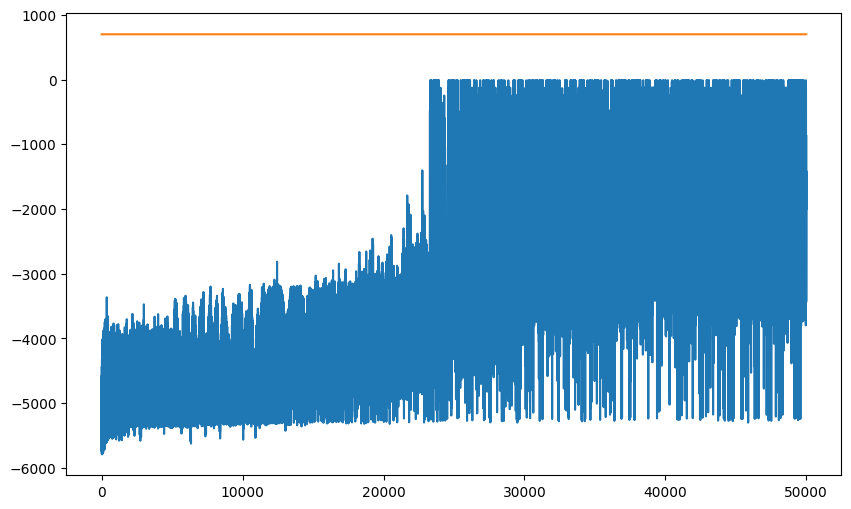

In [81]:
plt.figure(figsize=(10, 6))
plt.plot(rewards)
plt.plot(steps)

plt.show()

In [82]:
average_steps = np.mean(steps)
print("average steps: ", average_steps)
average_rewards = np.mean(rewards)
print("Average rewards: ", average_rewards)

average steps:  700.0
Average rewards:  -3253.1992384012838


In [83]:
Q

array([[[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        ...,

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
    

### Render

In [84]:
obs,_ = env.reset()
print(obs)
done = False
total_reward = 0
state = get_state(obs)
while not done:
    action = epsilon_greedy_policy(state, Q, 0.9)
    action_idx = actions.index(action)
    real_action = np.array([action_idx])
     
    obs, reward, done, _, _ = env.step(real_action)
    next_state = get_state(obs)
   
    total_reward += reward
    print('->', state, action, reward, obs, done)
    env.render()
    
print('total_reward', total_reward)

[-0.9804817  -0.19661032 -0.8338014 ]
-> (1, 9, 29) -0.7999999999999998 -8.738851525001847 [-0.9866088  -0.16310462 -0.68125916] False
-> (1, 9, 29) -0.19999999999999996 -8.917442514943687 [-0.99040246 -0.13821335 -0.5035876 ] False
-> (1, 9, 29) 0.6000000000000001 -9.046981264447103 [-0.9924088 -0.1229827 -0.3072476] False
-> (1, 9, 29) -0.5999999999999999 -9.12356180269946 [-0.99300826 -0.11804473 -0.09948463] False
-> (1, 9, 29) 0.40000000000000036 -9.145163580129376 [-0.9923318  -0.12360279  0.11198182] False
-> (1, 9, 29) 1.0 -9.111604051522365 [-0.9902322  -0.13942795  0.31927973] False
-> (1, 9, 29) -1.2 -9.024450680677296 [-0.9863165  -0.16486302  0.51470876] False
-> (1, 9, 29) 0.40000000000000036 -8.886910955443868 [-0.9800323 -0.1988381  0.6910615] False
-> (1, 9, 29) -1.4 -8.703710881396457 [-0.97079617 -0.23990583  0.84193295] False
-> (1, 9, 29) 1.4000000000000004 -8.480963636763635 [-0.9581383  -0.28630581  0.9620036 ] False
-> (1, 9, 29) -0.19999999999999996 -8.22602125